In [1]:
import pandas as pd

In [2]:
users = pd.read_csv('users.csv', sep=',', decimal='\n')
users.birth_day = pd.to_datetime(users.birth_day, dayfirst=True)
users

,Unnamed: 0,ids,birth_day,gender
0,0,10000,1989-07-14,женщина
1,1,10001,1976-01-02,женщина
2,2,10002,1981-07-31,женщина
3,3,10003,1997-09-11,женщина
4,4,10004,2000-08-01,мужчина
...,...,...,...,...
5995,5995,15995,1984-08-20,женщина
5996,5996,15996,1980-04-17,женщина
5997,5997,15997,1974-12-21,женщина
5998,5998,15998,1991-12-19,мужчина


In [3]:
checks = pd.read_csv('checks.csv', sep=',', decimal='\n')
checks.dates = pd.to_datetime(checks.dates)
checks

,Unnamed: 0,dates,sum,ids,shop
0,0,2023-01-04 11:29:00,4499.0,14046,Жёлтый
1,1,2023-01-21 02:31:00,15902.0,12783,Жёлтый
2,2,2022-12-24 23:19:00,12808.0,14798,Фиолетовый
3,3,2022-12-21 03:23:00,2598.0,15032,Зелёный
4,4,2022-12-16 18:29:00,10191.0,14162,Оранжевый
...,...,...,...,...,...
19995,19995,2023-01-27 12:19:00,4166.0,14007,Жёлтый
19996,19996,2023-02-07 16:59:00,8959.0,14348,Синий
19997,19997,2022-12-15 15:51:00,13864.0,15396,Синий
19998,19998,2022-12-19 13:05:00,4757.0,15096,Жёлтый


In [4]:
nachecks = checks[checks['sum'].isna()]
nachecks

,Unnamed: 0,dates,sum,ids,shop
87,87,2022-12-29 04:53:00,NaN,15090,Жёлтый
88,88,2022-12-18 09:11:00,NaN,10943,Жёлтый
89,89,2023-01-18 02:08:00,NaN,14722,Жёлтый
98,98,2022-12-13 07:30:00,NaN,15385,Жёлтый
155,155,2023-01-14 07:37:00,NaN,15450,Жёлтый
159,159,2023-01-09 16:35:00,NaN,12937,Жёлтый
298,298,2023-01-22 03:46:00,NaN,14686,Жёлтый
300,300,2023-02-08 04:45:00,NaN,11926,Жёлтый
16871,16871,2023-01-15 05:30:00,NaN,10925,Жёлтый
16882,16882,2022-12-14 21:58:00,NaN,10053,Жёлтый


In [5]:
checks["month"] = pd.to_datetime(checks["dates"]).dt.to_period('M')
pivot_table = pd.pivot_table(checks, values='sum', index=['shop', 'month'], aggfunc='mean')
pivot_table

sum
shop       month                
Голубой    2022-12  10149.367197
           2023-01   9971.116065
           2023-02   9867.007177
Жёлтый     2022-12   9654.265743
           2023-01   9944.870795
           2023-02  10216.340909
Зелёный    2022-12  10317.073842
           2023-01  10219.497100
           2023-02   9919.921196
Красный    2022-12   9941.453106
           2023-01   9847.267502
           2023-02  10079.139037
Оранжевый  2022-12  10018.667089
           2023-01   9950.570566
           2023-02   9684.895782
Синий      2022-12   9594.392157
           2023-01  10017.061103
           2023-02   9848.000000
Фиолетовый 2022-12  10346.459527
           2023-01   9842.508601
           2023-02  10479.222222
Чёрный     2022-12   9858.275000
           2023-01  10170.373634
           2023-02   9731.042373

In [6]:
shops_with_nulls = checks.loc[checks["sum"].isnull(), "shop"].unique()
for shop in shops_with_nulls:
    for month in pivot_table.loc[shop].index:
        mean_value = pivot_table.loc[(shop, month), "sum"]
        checks.loc[(checks["shop"] == shop) & (checks["month"] == month) & (checks["sum"].isnull()), "sum"] = mean_value
checks

,Unnamed: 0,dates,sum,ids,shop,month
0,0,2023-01-04 11:29:00,4499.0,14046,Жёлтый,2023-01
1,1,2023-01-21 02:31:00,15902.0,12783,Жёлтый,2023-01
2,2,2022-12-24 23:19:00,12808.0,14798,Фиолетовый,2022-12
3,3,2022-12-21 03:23:00,2598.0,15032,Зелёный,2022-12
4,4,2022-12-16 18:29:00,10191.0,14162,Оранжевый,2022-12
...,...,...,...,...,...,...
19995,19995,2023-01-27 12:19:00,4166.0,14007,Жёлтый,2023-01
19996,19996,2023-02-07 16:59:00,8959.0,14348,Синий,2023-02
19997,19997,2022-12-15 15:51:00,13864.0,15396,Синий,2022-12
19998,19998,2022-12-19 13:05:00,4757.0,15096,Жёлтый,2022-12


In [7]:
nachecks = checks[checks['sum'].isna()]
nachecks

,Unnamed: 0,dates,sum,ids,shop,month


In [8]:
checks.groupby('shop')['sum'].sum().reset_index().sort_values('sum',ascending=False).head(1)

,shop,sum
6,Фиолетовый,25523100.0


<AxesSubplot:xlabel='shop'>

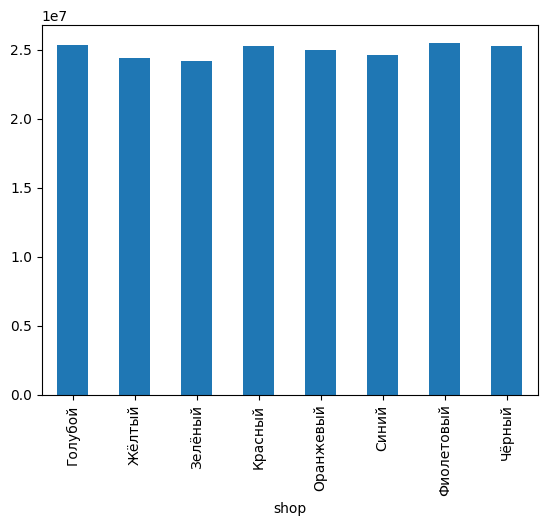

In [9]:
checks.groupby('shop')['sum'].sum().plot(kind='bar')

In [10]:
checks[pd.PeriodIndex(checks['dates'], freq="M") == '2023-02'].groupby('shop')['sum'].sum().reset_index().sort_values('sum',ascending=False).head(1)

,shop,sum
0,Голубой,4124409.0


<AxesSubplot:xlabel='shop'>

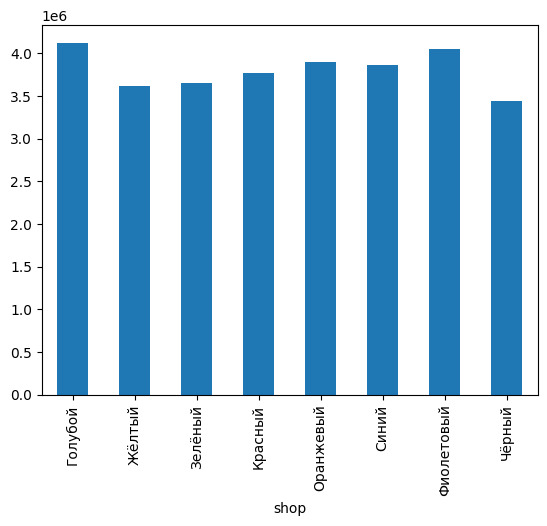

In [11]:
checks[pd.PeriodIndex(checks['dates'], freq="M") == '2023-02'].groupby('shop')['sum'].sum().plot(kind='bar')

In [12]:
checks.groupby('ids')['sum'].sum().reset_index().sort_values('sum',ascending=False).head(1)

,ids,sum
3837,13963,134325.0


In [13]:
from zodiac_sign import get_zodiac_sign

In [14]:
both = pd.merge(checks, users, how='left',on='ids')
both['zodiac'] = both['birth_day'].apply(lambda x : get_zodiac_sign(x))
both.groupby(['zodiac', 'gender'])['ids'].count()

zodiac       gender 
Aquarius     женщина    770
             мужчина    799
Aries        женщина    842
             мужчина    918
Cancer       женщина    880
             мужчина    903
Capricorn    женщина    762
             мужчина    800
Gemini       женщина    874
             мужчина    766
Leo          женщина    703
             мужчина    851
Libra        женщина    783
             мужчина    859
Pisces       женщина    853
             мужчина    814
Sagittarius  женщина    935
             мужчина    777
Scorpio      женщина    844
             мужчина    850
Taurus       женщина    818
             мужчина    909
Virgo        женщина    792
             мужчина    898
Name: ids, dtype: int64

<AxesSubplot:xlabel='zodiac,gender'>

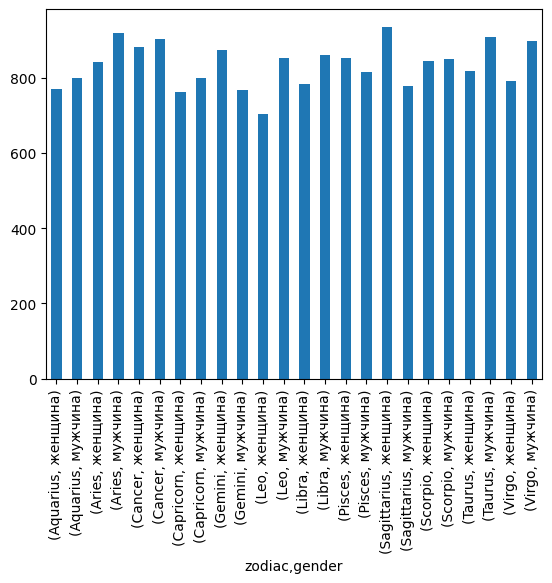

In [15]:
both.groupby(['zodiac', 'gender'])['ids'].count().plot(kind='bar')

In [16]:
def get_time_of_day(x):
    hour = x.hour
    if 7 <= hour < 15:
        return 'утро'
    elif 15 <= hour < 23:
        return 'вечер'
    else:
        return 'ночь'

checks['time_of_day'] = checks['dates'].apply(get_time_of_day)
checks

,Unnamed: 0,dates,sum,ids,shop,month,time_of_day
0,0,2023-01-04 11:29:00,4499.0,14046,Жёлтый,2023-01,утро
1,1,2023-01-21 02:31:00,15902.0,12783,Жёлтый,2023-01,ночь
2,2,2022-12-24 23:19:00,12808.0,14798,Фиолетовый,2022-12,ночь
3,3,2022-12-21 03:23:00,2598.0,15032,Зелёный,2022-12,ночь
4,4,2022-12-16 18:29:00,10191.0,14162,Оранжевый,2022-12,вечер
...,...,...,...,...,...,...,...
19995,19995,2023-01-27 12:19:00,4166.0,14007,Жёлтый,2023-01,утро
19996,19996,2023-02-07 16:59:00,8959.0,14348,Синий,2023-02,вечер
19997,19997,2022-12-15 15:51:00,13864.0,15396,Синий,2022-12,вечер
19998,19998,2022-12-19 13:05:00,4757.0,15096,Жёлтый,2022-12,утро


In [17]:
counts = checks['time_of_day'].value_counts()
print(counts)

ночь     6697
утро     6695
вечер    6608
Name: time_of_day, dtype: int64


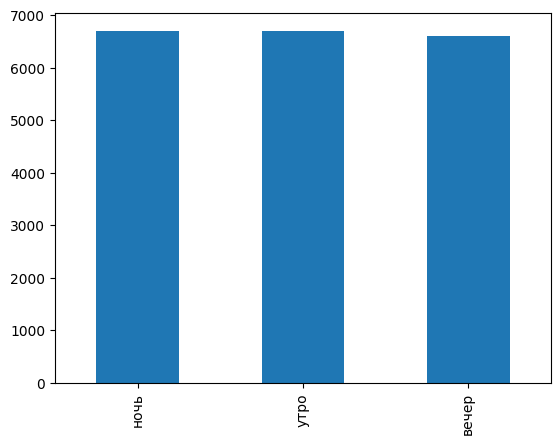

In [18]:
counts = checks['time_of_day'].value_counts().plot(kind='bar')